# T81-558: Applications of Deep Neural Networks
**Module 5: Regularization and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module Video Material

Main video lecture:

* [Part 5.1: Part 5.1: Introduction to Regularization: Ridge and Lasso](https://www.youtube.com/watch?v=9abzk34U56c&index=15&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)
* [Part 5.2: Using K-Fold Cross Validation with Keras](https://www.youtube.com/watch?v=GkKTWSInNvA&index=16&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)
* [Part 5.3: Using L1 and L2 Regularization with Keras to Decrease Overfitting](https://www.youtube.com/watch?v=uLa-b3JxWAM&index=17&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)
* [Part 5.4: Drop Out for Keras to Decrease Overfitting](https://www.youtube.com/watch?v=uLa-b3JxWAM&index=17&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)
* [Part 5.5: Benchmarking Keras Deep Learning Regularization Techniques](https://www.youtube.com/watch?v=uLa-b3JxWAM&index=17&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN)

# Part 5.1: Introduction to Regularization: Ridge and Lasso

We are going to look at linear regression to see how L1 and L2 regularization work.  The following code sets up the auto-mpg data for this purpose.

In [1]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [2]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

# Linear Regression

To understand L1/L2 regularization, it is good to start with linear regression.  L1/L2 were first introduced for [linear regression](https://en.wikipedia.org/wiki/Linear_regression).  They can also be used for neural networks.  To fully understand L1/L2 we will begin with how they are used with linear regression.

The following code uses linear regression to fit the auto-mpg data set.  The RMSE reported will not be as good as a neural network.

Final score (RMSE): 3.0019345985860784


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


Intercept: -19.101231042200112


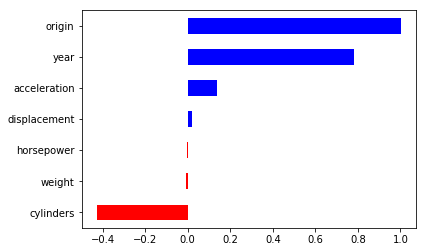

In [3]:
import sklearn

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

# L1 (Lasso) Regularization

L1 Regularization, also called LASSO (Least Absolute Shrinkage and Selection Operator) is should be used to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0.  When a weight is near 0, the program drops it from the network.  Dropping weighted connections will create a sparse neural network.

Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons.  Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary.  If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.

L1 is implemented by adding the following error to the objective to minimize:

$$ E_1 = \alpha \sum_w{ |w| } $$

The following code demonstrates lasso regression.  Notice the effect of the coefficients compared to the previous section that used linear regression.

Final score (RMSE): 3.060402190403331


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


Intercept: -18.50667798238321


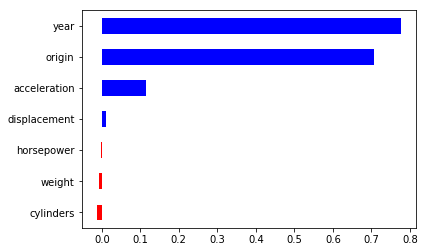

In [4]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)


(1e-08, 100000000.0)

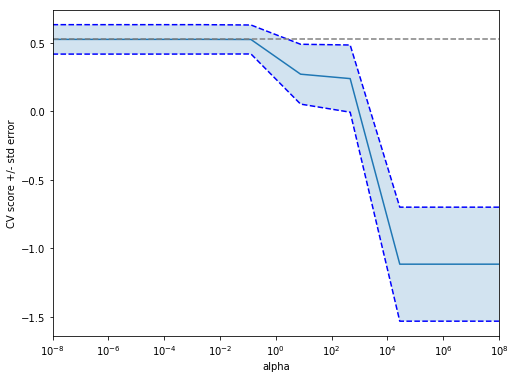

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state=42)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# L2 (Ridge) Regularization

You should use Tikhonov/Ridge/L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values.  The lower weight values will typically lead to less overfitting. 

$$ E_2 = \alpha \sum_w{ w^2 } $$

Like the L1 algorithm, the $\alpha$ value determines how important the L2 objective is compared to the neural network’s error.  Typical L2 values are below 0.1 (10%).  The main calculation performed by L2 is the summing of the squares of all of the weights.  The bias values are not summed.

The following code uses L2 with linear regression (Ridge regression):

Final score (RMSE): {score}


,coef,positive
cylinders,-0.421393,False
weight,-0.007257,False
horsepower,-0.005385,False
displacement,0.020006,True
acceleration,0.138470,True
year,0.782889,True
origin,0.994621,True


Intercept: -19.07980074425469


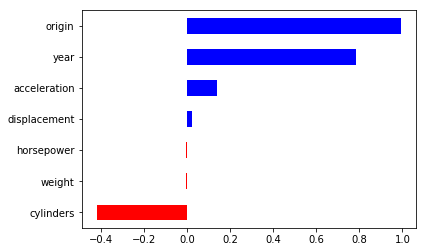

In [6]:
import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)


# ElasticNet Regularization

The ElasticNet regression combines both L1 and L2.  Both penalties are applied.  The amount of L1 and L2 are governed by the parameters alpha and beta.

$$
a * L1 + b * L2
$$

Final score (RMSE): 3.045089996077502


,coef,positive
cylinders,-0.274010,False
weight,-0.007303,False
horsepower,-0.003231,False
displacement,0.016194,True
acceleration,0.132348,True
year,0.777482,True
origin,0.782781,True


Intercept: -18.38935569042974


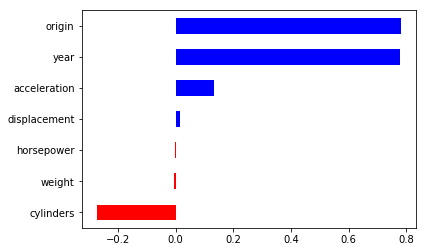

In [7]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

# Part 5.2: Using K-Fold Cross Validation with Keras

Cross-Validation uses a number of folds, and multiple models, to generate out of sample predictions on the entire dataset.  It is important to note that there will be one model (neural network) for each fold. Each model contributes part of the final out-of-sample prediction.

![K-Fold Crossvalidation](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_1_kfold.png "K-Fold Crossvalidation")

For new data, which is data not present in the training set, predictions from the fold models can be handled in several ways.

* Choose the model that had the highest validation score as the final model.
* Preset new data to the 5 models and average the result (this is an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning)).
* Retrain a new model (using the same settings as the cross-validation) on the entire dataset.  Train for as many epochs, and with the same hidden layer structure.

## Regression with K-Fold Cross-Validation

The following code trains the MPG dataset using a 5-fold cross-validation.  The expected performance of a neural network, of the type trained here, would be the score for the generated out-of-sample predictions.

In [30]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

In [32]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Cross-Validate
kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
oos_y = []
oos_pred = []
epochs_needed = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto', restore_best_weights=True)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)    
    epochs = monitor.stopped_epoch

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print(f"Fold score (RMSE): {score}, epochs needed {epochs}")
    epochs_needed.append(epochs)

print(f"Average number of epochs needed: {round(sum(epochs_needed)/len(epochs_needed))}")
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print(f"Final, out of sample score (RMSE): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)


Fold #1
Restoring model weights from the end of the best epoch.
Epoch 00137: early stopping
Fold score (RMSE): 0.7465897155896363, epochs needed 136
Fold #2
Restoring model weights from the end of the best epoch.
Epoch 00142: early stopping
Fold score (RMSE): 0.6236349426949113, epochs needed 141
Fold #3
Restoring model weights from the end of the best epoch.
Epoch 00134: early stopping
Fold score (RMSE): 0.8543803433697185, epochs needed 133
Fold #4
Restoring model weights from the end of the best epoch.
Epoch 00145: early stopping
Fold score (RMSE): 0.6874962044212919, epochs needed 144
Fold #5
Restoring model weights from the end of the best epoch.
Epoch 00117: early stopping
Fold score (RMSE): 1.0345504516785673, epochs needed 116
Average number of epochs needed: 134
Final, out of sample score (RMSE): 0.802399923289237


As you can see, the above code also reports the average number of epochs needed.  A common technique is to then train on the entire dataset for the average number of epochs needed.

### Classification with Stratified K-Fold Cross-Validation

The following code trains and fits the iris dataset with Cross-Validation.  It also writes out the out of sample (predictions on the test set) results.

It is good to perform a stratified k-fold cross validation with classification data.  This ensures that the percentages of each class remains the same across all folds.  To do this, make use of the **StratifiedKFold** object, instead of the **KFold** object used in regression.

In [17]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [37]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
kf = StratifiedKFold(5, shuffle=True, random_state=42) # Use for StratifiedKFold classification
    
oos_y = []
oos_pred = []
epochs_needed = []
fold = 0

for train, test in kf.split(x,df['product']): # Must specify y StratifiedKFold for 
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=25, verbose=1, mode='auto', restore_best_weights=True)

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
    oos_pred.append(pred)  
    epochs = monitor.stopped_epoch

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}, epochs needed {epochs}")
    epochs_needed.append(epochs)

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)



Fold #1
Restoring model weights from the end of the best epoch.
Epoch 00082: early stopping
Fold score (accuracy): 0.746268656716418, epochs needed 81
Fold #2
Restoring model weights from the end of the best epoch.
Epoch 00079: early stopping
Fold score (accuracy): 0.6890547263681592, epochs needed 78
Fold #3
Restoring model weights from the end of the best epoch.
Epoch 00052: early stopping
Fold score (accuracy): 0.71571072319202, epochs needed 51
Fold #4
Restoring model weights from the end of the best epoch.
Epoch 00064: early stopping
Fold score (accuracy): 0.6934673366834171, epochs needed 63
Fold #5
Restoring model weights from the end of the best epoch.
Epoch 00061: early stopping
Fold score (accuracy): 0.7178841309823678, epochs needed 60
Final score (accuracy): 0.7125


### Training with both a Cross-Validation and a Holdout Set

If you have a considerable amount of data, it is always valuable to set aside a holdout set before you cross-validate.  This hold out set will be the final evaluation before you make use of your model for its real-world use.

![Cross Validation and a Holdout Set](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_3_hold_train_val.png "Cross Validation and a Holdout Set")

The following program makes use of a holdout set, and then still cross-validates.  

In [12]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

# Keep a 10% holdout
x_main, x_holdout, y_main, y_holdout = train_test_split(    
    x, y, test_size=0.10) 


# Cross-validate
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0
for train, test in kf.split(x_main):        
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x_main[train]
    y_train = y_main[train]
    x_test = x_main[test]
    y_test = y_main[test]
    
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
            patience=5, verbose=1, mode='auto', restore_best_weights=True)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred) 

    # Measure accuracy
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print(f"Fold score (RMSE): {score}")


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print()
print(f"Cross-validated score (RMSE): {score}")    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = model.predict(x_holdout)

score = np.sqrt(metrics.mean_squared_error(holdout_pred,y_holdout))
print(f"Holdout score (RMSE): {score}")    


Fold #1
Restoring model weights from the end of the best epoch.
Epoch 00126: early stopping
Fold score (RMSE): 0.8277214937220675
Fold #2
Restoring model weights from the end of the best epoch.
Epoch 00187: early stopping
Fold score (RMSE): 0.8358278146230218
Fold #3
Restoring model weights from the end of the best epoch.
Epoch 00173: early stopping
Fold score (RMSE): 0.6928553150793878
Fold #4
Restoring model weights from the end of the best epoch.
Epoch 00136: early stopping
Fold score (RMSE): 0.6748407416330722
Fold #5
Restoring model weights from the end of the best epoch.
Epoch 00130: early stopping
Fold score (RMSE): 1.086916893238514

Cross-validated score (RMSE): 0.8367290904320087
Holdout score (RMSE): 0.8411745024788277


# Part 5.3: Using L1 and L2 Regularization with Keras to Decrease Overfitting

L1 and L2 regularization are two common regularization techniques that can reduce the effects of overfitting (Ng, 2004).  Both of these algorithms can either work with an objective function or as a part of the backpropagation algorithm.  In both cases the regularization algorithm is attached to the training algorithm by adding an additional objective.  

Both of these algorithms work by adding a weight penalty to the neural network training.  This penalty encourages the neural network to keep the weights to small values.  Both L1 and L2 calculate this penalty differently.  For gradient-descent-based algorithms, such as backpropagation, you can add this penalty calculation to the calculated gradients.  For objective-function-based training, such as simulated annealing, the penalty is negatively combined with the objective score.

Both L1 and L2 work differently in the way that they penalize the size of a weight.  L2 will force the weights into a pattern similar to a Gaussian distribution; the L1 will force the weights into a pattern similar to a Laplace distribution, as demonstrated the following:

![L1 vs L2](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_9_l1_l2.png "L1 vs L2")

As you can see, L1 algorithm is more tolerant of weights further from 0, whereas the L2 algorithm is less tolerant.  We will highlight other important differences between L1 and L2 in the following sections.  You also need to note that both L1 and L2 count their penalties based only on weights; they do not count penalties on bias values.

Tensor flow allows [l1/l2 to be directly added to your network](http://tensorlayer.readthedocs.io/en/stable/modules/cost.html).

In [33]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [15]:
########################################
# Keras with L1/L2 for Regression
########################################

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Cross-validate
kf = KFold(5, shuffle=True, random_state=42)
    
oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    #kernel_regularizer=regularizers.l2(0.01),
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], 
            activation='relu',
             activity_regularizer=regularizers.l1(1e-4))) # Hidden 1
    model.add(Dense(25, activation='relu', 
                    activity_regularizer=regularizers.l1(1e-4))) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
            patience=25, verbose=1, mode='auto', restore_best_weights=True)

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)
    oos_pred.append(pred)        

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)



Fold #1
Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Fold score (accuracy): 0.6975
Fold #2
Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
Fold score (accuracy): 0.7425
Fold #3
Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping
Fold score (accuracy): 0.71
Fold #4
Restoring model weights from the end of the best epoch.
Epoch 00083: early stopping
Fold score (accuracy): 0.7125
Fold #5
Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Fold score (accuracy): 0.695
Final score (accuracy): 0.7115


# Part 5.4: Drop Out for Keras to Decrease Overfitting

Srivastava, N., Hinton, G. E., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). [Dropout: a simple way to prevent neural networks from overfitting.](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) *Journal of Machine Learning Research*, 15(1), 1929-1958.

Most neural network frameworks implement dropout as a separate layer.  Dropout layers function as a regular, densely connected neural network layer.  The only difference is that the dropout layers will periodically drop some of their neurons during training.  You can use dropout layers on regular feedforward neural networks. In fact, they can also become layers in convolutional LeNET-5 networks like we studied in class 8.

The usual hyper-parameters for a dropout layer are the following:
* Neuron Count
* Activation Function
* Dropout Probability

The neuron count and activation function hyper-parameters work exactly the same way as their corresponding parameters in the dense layer type mentioned previously. The neuron count simply specifies the number of neurons in the dropout layer.  The dropout probability indicates the likelihood of a neuron dropping out during the training iteration.  Just as it does for a dense layer, the program specifies an activation function for the dropout layer.

![Dropout Regularization](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_9_dropout.png "Dropout Regularization")

A certain percentage of neurons will be masked during each training step.  All neurons return after training is complete.  To make use of dropout in Keras use the **Dropout** layer and specify a dropout probability.  This is the percent of neurons to be dropped.  Typically, this is a low value, such as 0.1.

Animation that shows how [dropout works](https://yusugomori.com/projects/deep-learning/dropout-relu)

In [16]:
############################################
# TensorFlow with Dropout for Regression
############################################
%matplotlib inline
from matplotlib.pyplot import figure, show
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

path = "./data/"

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

model = Sequential()
model.add(Dense(50, input_dim=x.shape[1]))
model.add(Dropout(0.01))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
pred = model.predict(x_test)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

NameError: name 'missing_median' is not defined

# Part 5.5: Benchmarking Keras Deep Learning Regularization Techniques

In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### Bootstrapping for Regression

In [6]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

In [11]:
import pandas as pd
import os
import numpy as np
import time
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit

SPLITS = 50

# Bootstrap
boot = ShuffleSplit(n_splits=SPLITS, test_size=0.1, random_state=42)

# Track progress
mean_benchmark = []
num = 0

# Loop through samples
for train, test in boot.split(x):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    # Construct neural network
    model = Sequential()
    model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    
    # Predict on the out of boot (validation)
    pred = model.predict(x_test)
  
    # Measure this bootstrap's log loss
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    mean_benchmark.append(score)
    m = sum(mean_benchmark)/len(mean_benchmark)
    
    # Record this iteration
    time_took = time.time() - start_time
    print(f"Bootstrap #{num}: RMSE Score={score}, mean score={m}, epochs={epochs}, time={hms_string(time_took)}")

Bootstrap #1: score=0.7447948920113355, mean score=0.7447948920113355, epochs=104, time=0:00:05.77
Bootstrap #2: score=0.8680367473891414, mean score=0.8064158197002385, epochs=119, time=0:00:06.12
Bootstrap #3: score=0.7820547846592762, mean score=0.7982954746865843, epochs=99, time=0:00:05.17
Bootstrap #4: score=0.5670574259730553, mean score=0.7404859625082021, epochs=144, time=0:00:07.39
Bootstrap #5: score=0.5920759728764031, mean score=0.7108039645818423, epochs=120, time=0:00:06.58
Bootstrap #6: score=0.8802537973831938, mean score=0.7390456033820675, epochs=127, time=0:00:07.60
Bootstrap #7: score=0.561739570929457, mean score=0.7137161701745517, epochs=116, time=0:00:06.10
Bootstrap #8: score=0.5101354448176023, mean score=0.688268579504933, epochs=156, time=0:00:08.59
Bootstrap #9: score=0.6945224576729497, mean score=0.6889634548569349, epochs=146, time=0:00:07.79
Bootstrap #10: score=1.1181064460075167, mean score=0.731877753971993, epochs=144, time=0:00:07.39
Bootstrap #11

### Bootstrapping for Classification

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [ ]:
import pandas as pd
import os
import numpy as np
import time
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedShuffleSplit

SPLITS = 50

# Bootstrap
boot = StratifiedShuffleSplit(n_splits=SPLITS, test_size=0.1, random_state=42)

# Track progress
mean_benchmark = []
num = 0

# Loop through samples
for train, test in boot.split(x,df['product']):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    # Construct neural network
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=25, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    
    # Predict on the out of boot (validation)
    pred = model.predict(x_test)
  
    # Measure this bootstrap's log loss
    y_compare = np.argmax(y_test,axis=1) # For log loss calculation
    score = metrics.log_loss(y_compare, pred)
    mean_benchmark.append(score)
    m = sum(mean_benchmark)/len(mean_benchmark)
    
    # Record this iteration
    time_took = time.time() - start_time
    print(f"Bootstrap #{num}: Log Loss Sore={score}, mean score={m}, epochs={epochs}, time={hms_string(time_took)}")

### Benchmarking

In [2]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [3]:
import pandas as pd
import os
import numpy as np
import time
import tensorflow.keras.initializers
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedShuffleSplit
import statistics
from tensorflow.keras.layers import LeakyReLU,PReLU

SPLITS = 100

# Bootstrap
boot = StratifiedShuffleSplit(n_splits=SPLITS, test_size=0.1)

# Track progress
mean_benchmark = []
num = 0

# Loop through samples
for train, test in boot.split(x,df['product']):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    # Construct neural network
    # kernel_initializer = tensorflow.keras.initializers.he_uniform(seed=None)
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation=PReLU()
            #kernel_regularizer=regularizers.l2(1e-4)
    )) # Hidden 1
    model.add(Dropout(0.5))
    model.add(Dense(50, activation=PReLU()
            #activity_regularizer=regularizers.l2(1e-4)
    )) # Hidden 2
    model.add(Dropout(0.5))
    model.add(Dense(50, activation=PReLU()
            #activity_regularizer=regularizers.l2(1e-4)
    )) # Hidden 2
#    model.add(Dropout(0.5))
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=100, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    
    # Predict on the out of boot (validation)
    pred = model.predict(x_test)
  
    # Measure this bootstrap's log loss
    y_compare = np.argmax(y_test,axis=1) # For log loss calculation
    score = metrics.log_loss(y_compare, pred)
    mean_benchmark.append(score)
    m = statistics.mean(mean_benchmark)
    mdev = statistics.pstdev(mean_benchmark)
    
    # Record this iteration
    time_took = time.time() - start_time
    print(f"Bootstrap #{num}: Log Loss score={score:.6f}, mean score={m:.6f}, stdev={mdev:.6f} epochs={epochs}, time={hms_string(time_took)}")
# https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404

# 100 Prelu 0.5 1-2, He init
# Bootstrap #100: Log Loss score=0.604399, mean score=0.651921, stdev=0.045944 epochs=298, time=0:00:40.12
# 100 Prelu 0.5 1-2
# Bootstrap #53: Log Loss score=0.652944, mean score=0.655620, stdev=0.050328 epochs=269, time=0:00:51.02


Bootstrap #1: Log Loss score=0.627267, mean score=0.627267, stdev=0.000000 epochs=314, time=0:00:26.09
Bootstrap #2: Log Loss score=0.763436, mean score=0.695352, stdev=0.068085 epochs=138, time=0:00:12.73
Bootstrap #3: Log Loss score=0.655261, mean score=0.681988, stdev=0.058716 epochs=163, time=0:00:14.59
Bootstrap #4: Log Loss score=0.733282, mean score=0.694812, stdev=0.055488 epochs=186, time=0:00:17.00
Bootstrap #5: Log Loss score=0.695168, mean score=0.694883, stdev=0.049631 epochs=171, time=0:00:21.24
Bootstrap #6: Log Loss score=0.672425, mean score=0.691140, stdev=0.046073 epochs=214, time=0:00:27.14
Bootstrap #7: Log Loss score=0.692991, mean score=0.691404, stdev=0.042660 epochs=302, time=0:00:38.87
Bootstrap #8: Log Loss score=0.688647, mean score=0.691060, stdev=0.039915 epochs=249, time=0:00:23.80
Bootstrap #9: Log Loss score=0.726430, mean score=0.694990, stdev=0.039240 epochs=169, time=0:00:15.50
Bootstrap #10: Log Loss score=0.638404, mean score=0.689331, stdev=0.0409

Bootstrap #80: Log Loss score=0.649941, mean score=0.665664, stdev=0.050705 epochs=207, time=0:00:24.09
Bootstrap #81: Log Loss score=0.710189, mean score=0.666213, stdev=0.050630 epochs=199, time=0:00:26.83
Bootstrap #82: Log Loss score=0.574302, mean score=0.665092, stdev=0.051322 epochs=341, time=0:00:35.00
Bootstrap #83: Log Loss score=0.686869, mean score=0.665355, stdev=0.051067 epochs=223, time=0:00:28.01
Bootstrap #84: Log Loss score=0.637058, mean score=0.665018, stdev=0.050855 epochs=239, time=0:00:29.53
Bootstrap #85: Log Loss score=0.601013, mean score=0.664265, stdev=0.051024 epochs=518, time=0:00:52.86
Bootstrap #86: Log Loss score=0.695617, mean score=0.664629, stdev=0.050837 epochs=197, time=0:00:23.18
Bootstrap #87: Log Loss score=0.632398, mean score=0.664259, stdev=0.050661 epochs=255, time=0:00:29.14
Bootstrap #88: Log Loss score=0.626079, mean score=0.663825, stdev=0.050534 epochs=190, time=0:00:21.34
Bootstrap #89: Log Loss score=0.681632, mean score=0.664025, std